# Image Augmentation 

In [46]:
#importing useful initial libraries
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os,sys
from PIL import Image
import scipy.misc

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Transpose   
)

In [47]:
# Paths to aerial and groundtruth images
root_dir = "Datasets/training/training/"
images_dir = root_dir + "images/"
gt_images_dir = root_dir + "groundtruth/"

# Helper functions definition

In [48]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
        
def load_image(infilename):
    data = mpimg.imread(infilename)
    return data

def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

# Concatenate an image and its groundtruth
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)          
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

def img_crop(im, w, h):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    for i in range(0,imgheight,h):
        for j in range(0,imgwidth,w):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
            list_patches.append(im_patch)
    return list_patches

# Basic visualisation

In [63]:
image = cv2.imread(images_dir + 'satImage_001.png')
mask = cv2.imread(gt_images_dir + 'satImage_001.png')

In [51]:
original_height, original_width = image.shape[:2]

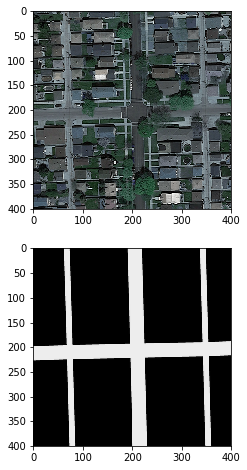

In [52]:
visualize(image, mask)

# Horizontal Flip

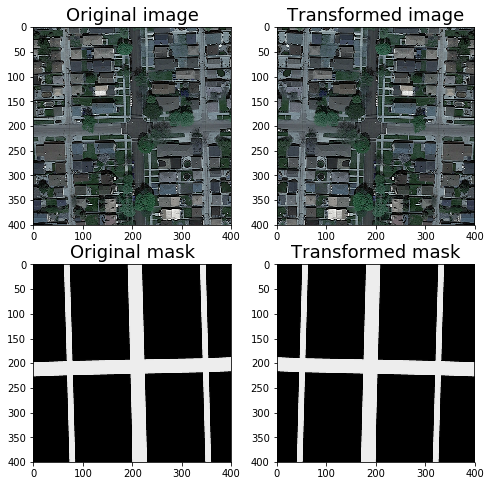

In [53]:
aug = HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

# Vertical Flip

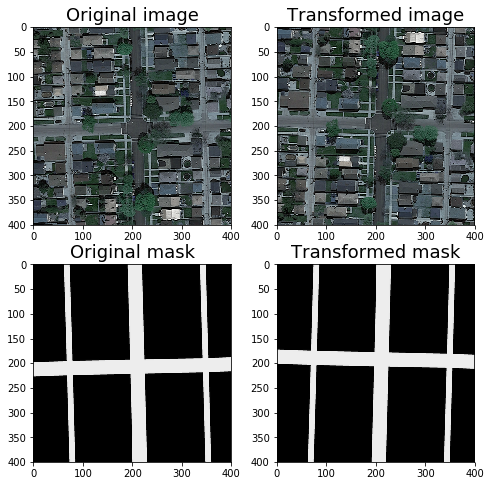

In [54]:
aug = VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

visualize(image_v_flipped, mask_v_flipped, original_image=image, original_mask=mask)

# Image transposition

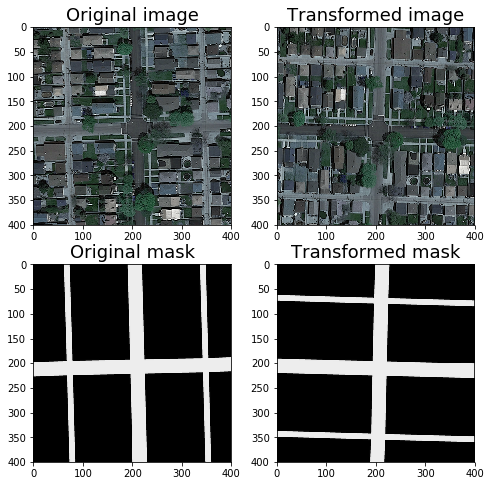

In [55]:
aug = Transpose(p=1)

augmented = aug(image=image, mask=mask)

image_transposed = augmented['image']
mask_transposed = augmented['mask']

visualize(image_transposed, mask_transposed, original_image=image, original_mask=mask)

# Image Augmentation
### Here we augment the original set of images using the previously described methods. **Run the cells below to generate the augmented images**.

In [57]:
files = os.listdir(images_dir)

org_num_images = len(files) #100 original aerial images and corresponding groundtruth images
num_images = 100     #for saving purposes
num_gt_images = 100  #for saving purposes

print("Loading " + str(org_num_images) + " images.")
imgs = [load_image(images_dir + files[i]) for i in range(org_num_images)]

print("Loading the " + str(org_num_images) + " corresponding groundtruth images.")
gt_imgs = [load_image(gt_images_dir + files[i]) for i in range(org_num_images)]

Loading 100 images.
Loading the 100 corresponding groundtruth images.


# Augmenting aerial images

In [58]:
#flip original images horizontally and save them
for i in range(org_num_images):

    num_images += 1
    hf_img = np.flip(imgs[i], axis = 1)
    scipy.misc.imsave(images_dir+'satImage_'+str(num_images)+'.png', hf_img)

#flip original images vertically and save them
for j in range(org_num_images):

    num_images += 1
    vf_img = np.flip(imgs[j], axis = 0)
    scipy.misc.imsave(images_dir+'satImage_'+str(num_images)+'.png', vf_img)
    
    
#flip original images horizontally and vertically and save them
for k in range(org_num_images):
    
    num_images += 1
    hf_vf_img = np.flip(np.flip(imgs[k], axis = 1), axis = 0)
    scipy.misc.imsave(images_dir+'satImage_'+str(num_images)+'.png', hf_vf_img)

C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]
C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


# Augmenting masks

In [59]:
#flip original images horizontally and save them
for i in range(org_num_images):

    num_gt_images += 1
    hf_img = np.flip(gt_imgs[i], axis = 1)
    scipy.misc.imsave(gt_images_dir+'satImage_'+str(num_gt_images)+'.png', hf_img)

#flip original images vertically and save them
for j in range(org_num_images):

    num_gt_images += 1
    vf_img = np.flip(gt_imgs[j], axis = 0)
    scipy.misc.imsave(gt_images_dir+'satImage_'+str(num_gt_images)+'.png', vf_img)
    
    
#flip original images horizontally and vertically and save them
for k in range(org_num_images):
    
    num_gt_images += 1
    hf_vf_img = np.flip(np.flip(gt_imgs[k], axis = 1), axis = 0)
    scipy.misc.imsave(gt_images_dir+'satImage_'+str(num_gt_images)+'.png', hf_vf_img)

C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]
C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


# Transposing augmented images

In [62]:
type(imgs[0])

numpy.ndarray

In [66]:
new_files = os.listdir(images_dir)
new_num_images = len(new_files)

print("Loading the " + str(new_num_images) + " new images.")
new_imgs = [load_image(images_dir + new_files[i]) for i in range(new_num_images)]

print("Loading the " + str(new_num_images) + " new corresponding groundtruth images.")
new_gt_imgs = [load_image(gt_images_dir + new_files[i]) for i in range(new_num_images)]

aug = Transpose(p=1)

for i in range(new_num_images):
    
    num_images += 1
    num_gt_images += 1
    
    augmented = aug(image=new_imgs[i], mask=new_gt_imgs[i])
    
    image_transposed = augmented['image']
    mask_transposed = augmented['mask']
    
    scipy.misc.imsave(images_dir+'satImage_'+str(num_images)+'.png', image_transposed)
    scipy.misc.imsave(gt_images_dir+'satImage_'+str(num_gt_images)+'.png', mask_transposed)
    
print("Aerial and groundtruth images were successfully transposed.")

Loading the 400 new images.
Loading the 400 new corresponding groundtruth images.


C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Users\doria\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
